In [1]:
import sympy as sp
sp.init_printing()

from sympy import vector

S = vector.CoordSys3D('', vector_names=['r', "\\theta", r"\phi"],
                     variable_names=['r', "\\theta", r"\phi"])

## Problem 1.40

## Problem 1.43

## Problem 1.44

## Problem 1.45

## Problem 1.58

### Problem 1.59
Check the divergence theorem for the function $$\mathbf{v} = r^2\sin\theta\,\hat{\mathbf{r}} + 4r^2\cos\theta\,\hat{\boldsymbol{\theta}} + r^2\tan\theta \,\hat{\boldsymbol{\phi}} $$ using the volume of the ice-cream cone shown in figure 1.52.

*[Answer: $\pi R^4/12)(2\pi + 3\sqrt{3})$]*


In [2]:
r = S.x
theta = S.y
phi = S.z
rhat = S.i
thetahat = S.j
phihat = S.k

v = r**2*sp.sin(theta)*rhat + 4*r**2*sp.cos(theta)*thetahat + r**2*sp.tan(theta)*phihat

In [3]:
def div_spherical(vec):
    """Take the divergence in spherical coordinates.
    
    Works on a sympy.vector style vector.
    """
    
    # this was not obvious to me; required some source diving
    coordsys = list(vec.atoms(vector.CoordSys3D))[0]
    
    # to simplify notation
    r = coordsys.x
    theta = coordsys.y
    phi = coordsys.z
    
    rhat = coordsys.i
    thetahat = coordsys.j
    phihat = coordsys.k
    
    # from the inside cover of Griffiths
    divr = (1/r**2 * sp.diff(r**2*vec.dot(rhat), r) + 
        1/(r*sp.sin(theta))*sp.diff(sp.sin(theta)*vec.dot(thetahat), theta) +
        1/(r*sp.sin(theta))*sp.diff(vec.dot(phihat), phi))
    
    return divr

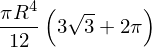

In [8]:
R = sp.symbols('R')

cream = sp.integrate(sp.integrate( (v.dot(rhat)*r**2*sp.sin(theta)).subs(r, R),
                                (theta, 0, sp.pi/6)),
                   (phi, 0, 2*sp.pi))
cone = sp.integrate(sp.integrate( (v.dot(thetahat)*r*sp.sin(theta)).subs(theta, sp.pi/6),
                                (r, 0, R)),
                   (phi, 0, 2*sp.pi))

surface_integral = cone + cream
sp.simplify(surface_integral)

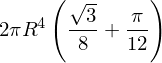

In [9]:
div_v = sp.simplify(div_spherical(v))

volume_integral = sp.integrate(sp.integrate(sp.integrate(div_v*r**2*sp.sin(theta),
                                                        (r, 0, R)),
                                           (theta, 0, sp.pi/6)),
                              (phi, 0, 2*sp.pi))
volume_integral

In [11]:
sp.simplify(surface_integral - volume_integral)